<a href="https://colab.research.google.com/github/nickname8888/deep_learning_chatbot/blob/main/small_messaging_chatbot_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://www.cs.cornell.edu/~cristian/data/cornell_movie_dialogs_corpus.zip

--2022-04-29 15:09:33--  http://www.cs.cornell.edu/~cristian/data/cornell_movie_dialogs_corpus.zip
Resolving www.cs.cornell.edu (www.cs.cornell.edu)... 132.236.207.36
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9916637 (9.5M) [application/zip]
Saving to: ‘cornell_movie_dialogs_corpus.zip’

cornell_movie_dialo 100%[===================>]   9.46M  25.1MB/s    in 0.4s    

2022-04-29 15:09:34 (25.1 MB/s) - ‘cornell_movie_dialogs_corpus.zip’ saved [9916637/9916637]



In [2]:
!unzip /content/cornell_movie_dialogs_corpus.zip -d /content/data

Archive:  /content/cornell_movie_dialogs_corpus.zip
   creating: /content/data/cornell movie-dialogs corpus/
  inflating: /content/data/cornell movie-dialogs corpus/.DS_Store  
   creating: /content/data/__MACOSX/
   creating: /content/data/__MACOSX/cornell movie-dialogs corpus/
  inflating: /content/data/__MACOSX/cornell movie-dialogs corpus/._.DS_Store  
  inflating: /content/data/cornell movie-dialogs corpus/chameleons.pdf  
  inflating: /content/data/__MACOSX/cornell movie-dialogs corpus/._chameleons.pdf  
  inflating: /content/data/cornell movie-dialogs corpus/movie_characters_metadata.txt  
  inflating: /content/data/cornell movie-dialogs corpus/movie_conversations.txt  
  inflating: /content/data/cornell movie-dialogs corpus/movie_lines.txt  
  inflating: /content/data/cornell movie-dialogs corpus/movie_titles_metadata.txt  
  inflating: /content/data/cornell movie-dialogs corpus/raw_script_urls.txt  
  inflating: /content/data/cornell movie-dialogs corpus/README.txt  
  inflati

In [3]:
import re

lines = open('/content/data/cornell movie-dialogs corpus/movie_lines.txt', encoding='utf-8',
             errors='ignore').read().split('\n')

convers = open('/content/data/cornell movie-dialogs corpus/movie_conversations.txt', encoding='utf-8',
             errors='ignore').read().split('\n')

print(convers[:10])
# print(covers)

["u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L194', 'L195', 'L196', 'L197']", "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L198', 'L199']", "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L200', 'L201', 'L202', 'L203']", "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L204', 'L205', 'L206']", "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L207', 'L208']", "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L271', 'L272', 'L273', 'L274', 'L275']", "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L276', 'L277']", "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L280', 'L281']", "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L363', 'L364']", "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L365', 'L366']"]


In [4]:
exchn = []
for conver in convers:
    exchn.append(conver.split(' +++$+++ ')[-1][1:-1].replace("'", " ").replace(",","").split())

diag = {}
for line in lines:
    diag[line.split(' +++$+++ ')[0]] = line.split(' +++$+++ ')[-1]

## delete
del(lines, convers, conver, line)

In [5]:
# print(exchn[:10])
print({k: diag[k] for k in list(diag)[:10]})

{'L1045': 'They do not!', 'L1044': 'They do to!', 'L985': 'I hope so.', 'L984': 'She okay?', 'L925': "Let's go.", 'L924': 'Wow', 'L872': "Okay -- you're gonna need to learn how to lie.", 'L871': 'No', 'L870': 'I\'m kidding.  You know how sometimes you just become this "persona"?  And you don\'t know how to quit?', 'L869': 'Like my fear of wearing pastels?'}


In [6]:
questions = []
answers = []

for conver in exchn:
    for i in range(len(conver) - 1):
        questions.append(diag[conver[i]])
        answers.append(diag[conver[i+1]])

## delete
del(diag, exchn, conver, i)

print(questions[:10])
print(answers[:10])

['Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again.', "Well, I thought we'd start with pronunciation, if that's okay with you.", 'Not the hacking and gagging and spitting part.  Please.', "You're asking me out.  That's so cute. What's your name again?", "No, no, it's my fault -- we didn't have a proper introduction ---", 'Cameron.', "The thing is, Cameron -- I'm at the mercy of a particularly hideous breed of loser.  My sister.  I can't date until she does.", 'Why?', 'Unsolved mystery.  She used to be really popular when she started high school, then it was just like she got sick of it or something.', 'Gosh, if only we could find Kat a boyfriend...']
["Well, I thought we'd start with pronunciation, if that's okay with you.", 'Not the hacking and gagging and spitting part.  Please.', "Okay... then how 'bout we try out some French cuisine.  Saturday?  Night?", 'Forget it.', 'Cameron.', "The thing is, Came

In [7]:
sorted_ques = []
sorted_ans = []
for i in range(len(questions)):
    if len(questions[i]) < 13:
        sorted_ques.append(questions[i])
        sorted_ans.append(answers[i])

print(sorted_ques[:10])
print(sorted_ans[:10])

['Cameron.', 'Why?', 'There.', 'Sure have.', 'Hi.', 'I was?', 'Well, no...', 'But', 'What crap?', 'No']
["The thing is, Cameron -- I'm at the mercy of a particularly hideous breed of loser.  My sister.  I can't date until she does.", 'Unsolved mystery.  She used to be really popular when she started high school, then it was just like she got sick of it or something.', 'Where?', "I really, really, really wanna go, but I can't.  Not unless my sister goes.", 'Looks like things worked out tonight, huh?', "You never wanted to go out with 'me, did you?", "Then that's all you had to say.", 'You always been this selfish?', "Me.  This endless ...blonde babble. I'm like, boring myself.", "Okay -- you're gonna need to learn how to lie."]


In [8]:
def clean_text(txt):
    txt = txt.lower()
    txt = re.sub(r"i'm", "i am", txt)
    txt = re.sub(r"he's", "he is", txt)
    txt = re.sub(r"she's", "she is", txt)
    txt = re.sub(r"that's", "that is", txt)
    txt = re.sub(r"what's", "what is", txt)
    txt = re.sub(r"where's", "where is", txt)
    txt = re.sub(r"\'ll", " will", txt)
    txt = re.sub(r"\'ve", " have", txt)
    txt = re.sub(r"\'re", " are", txt)
    txt = re.sub(r"\'d", " would", txt)
    txt = re.sub(r"won't", "will not", txt)
    txt = re.sub(r"can't", "can not", txt)
    txt = re.sub(r"[^\w\s]", "", txt)
    return txt

In [9]:
clean_ques = []
clean_ans = []

for line in sorted_ques:
    clean_ques.append(clean_text(line))
        
for line in sorted_ans:
    clean_ans.append(clean_text(line))

## delete
del(answers, questions, line)

In [10]:
print(clean_ques[:10])
print(clean_ans[:10])

['cameron', 'why', 'there', 'sure have', 'hi', 'i was', 'well no', 'but', 'what crap', 'no']
['the thing is cameron  i am at the mercy of a particularly hideous breed of loser  my sister  i can not date until she does', 'unsolved mystery  she used to be really popular when she started high school then it was just like she got sick of it or something', 'where', 'i really really really wanna go but i can not  not unless my sister goes', 'looks like things worked out tonight huh', 'you never wanted to go out with me did you', 'then that is all you had to say', 'you always been this selfish', 'me  this endless blonde babble i am like boring myself', 'okay  you are gonna need to learn how to lie']


In [11]:
for i in range(len(clean_ans)):
    clean_ans[i] = ' '.join(clean_ans[i].split()[:11])

del(sorted_ans, sorted_ques)
print(clean_ans[:10])

['the thing is cameron i am at the mercy of a', 'unsolved mystery she used to be really popular when she started', 'where', 'i really really really wanna go but i can not not', 'looks like things worked out tonight huh', 'you never wanted to go out with me did you', 'then that is all you had to say', 'you always been this selfish', 'me this endless blonde babble i am like boring myself', 'okay you are gonna need to learn how to lie']


In [12]:
## trimming
clean_ans=clean_ans[:30000]
clean_ques=clean_ques[:30000]

In [13]:
word2count = {}

for line in clean_ques:
    for word in line.split():
        if word not in word2count:
            word2count[word] = 1
        else:
            word2count[word] += 1
for line in clean_ans:
    for word in line.split():
        if word not in word2count:
            word2count[word] = 1
        else:
            word2count[word] += 1

## delete
del(word, line)

In [14]:
thresh = 5

vocab = {}
word_num = 0
for word, count in word2count.items():
    if count >= thresh:
        vocab[word] = word_num
        word_num += 1
        
## delete
del(word2count, word, count, thresh)       
del(word_num)        

In [15]:
print({k: vocab[k] for k in list(vocab)[:10]})

{'cameron': 0, 'why': 1, 'there': 2, 'sure': 3, 'have': 4, 'hi': 5, 'i': 6, 'was': 7, 'well': 8, 'no': 9}


In [16]:
for i in range(len(clean_ans)):
    clean_ans[i] = '<SOS> ' + clean_ans[i] + ' <EOS>'

tokens = ['<PAD>', '<EOS>', '<OUT>', '<SOS>']
x = len(vocab)
for token in tokens:
    vocab[token] = x
    x += 1
  
vocab['cameron'] = vocab['<PAD>']
vocab['<PAD>'] = 0

## delete
del(token, tokens) 
del(x)

### inv answers dict ###
inv_vocab = {w:v for v, w in vocab.items()}

## delete
del(i)

In [17]:
encoder_inp = []
for line in clean_ques:
    lst = []
    for word in line.split():
        if word not in vocab:
            lst.append(vocab['<OUT>'])
        else:
            lst.append(vocab[word])
        
    encoder_inp.append(lst)

decoder_inp = []
for line in clean_ans:
    lst = []
    for word in line.split():
        if word not in vocab:
            lst.append(vocab['<OUT>'])
        else:
            lst.append(vocab[word])        
    decoder_inp.append(lst)

### delete
del(clean_ans, clean_ques, line, lst, word)

In [18]:
print(encoder_inp[:10])
print(decoder_inp[:10])

[[3023], [1], [2], [3, 4], [5], [6, 7], [8, 9], [10], [11, 12], [9]]
[[3026, 60, 524, 28, 3023, 6, 40, 280, 60, 3025, 68, 87, 3024], [3026, 3025, 938, 14, 1042, 18, 227, 125, 2234, 70, 14, 2235, 3024], [3026, 151, 3024], [3026, 6, 125, 125, 125, 1035, 31, 10, 6, 235, 29, 29, 3024], [3026, 1482, 364, 883, 986, 35, 105, 64, 3024], [3026, 47, 33, 1133, 18, 31, 35, 207, 50, 110, 47, 3024], [3026, 84, 27, 28, 146, 47, 760, 18, 73, 3024], [3026, 47, 811, 1253, 46, 3025, 3024], [3026, 50, 46, 3025, 1510, 3025, 6, 40, 364, 1401, 504, 3024], [3026, 15, 47, 82, 2098, 1322, 18, 1845, 59, 18, 780, 3024]]


In [19]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
encoder_inp = pad_sequences(encoder_inp, 13, padding='post', truncating='post')
decoder_inp = pad_sequences(decoder_inp, 13, padding='post', truncating='post')

In [20]:
decoder_final_output = []
for i in decoder_inp:
    decoder_final_output.append(i[1:]) 

decoder_final_output = pad_sequences(decoder_final_output, 13, padding='post', truncating='post')


del(i)

In [21]:
from tensorflow.keras.utils import to_categorical
decoder_final_output = to_categorical(decoder_final_output, len(vocab))

print(decoder_final_output.shape)

(30000, 13, 3027)


In [22]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Embedding, LSTM, Input


enc_inp = Input(shape=(13, ))
dec_inp = Input(shape=(13, ))


VOCAB_SIZE = len(vocab)
embed = Embedding(VOCAB_SIZE+1, output_dim=50, 
                  input_length=13,
                  trainable=True                  
                  )


enc_embed = embed(enc_inp)
enc_lstm = LSTM(400, return_sequences=True, return_state=True)
enc_op, h, c = enc_lstm(enc_embed)
enc_states = [h, c]



dec_embed = embed(dec_inp)
dec_lstm = LSTM(400, return_sequences=True, return_state=True)
dec_op, _, _ = dec_lstm(dec_embed, initial_state=enc_states)

dense = Dense(VOCAB_SIZE, activation='softmax')

dense_op = dense(dec_op)

model = Model([enc_inp, dec_inp], dense_op)

In [23]:
model.compile(loss='categorical_crossentropy',metrics=['acc'],optimizer='adam')

In [24]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 13)]         0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 13)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 13, 50)       151400      ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 13, 400),    721600      ['embedding[0][0]']          

In [25]:
history = model.fit([encoder_inp, decoder_inp],decoder_final_output,epochs=150)

Epoch 1/150
938/938 [==============================] - 36s 30ms/step - loss: 3.1053 - acc: 0.4932
Epoch 2/150
938/938 [==============================] - 26s 28ms/step - loss: 2.7425 - acc: 0.5319
Epoch 3/150
938/938 [==============================] - 26s 27ms/step - loss: 2.6090 - acc: 0.5423
Epoch 4/150
938/938 [==============================] - 25s 27ms/step - loss: 2.5363 - acc: 0.5468
Epoch 5/150
938/938 [==============================] - 25s 27ms/step - loss: 2.4784 - acc: 0.5505
Epoch 6/150
938/938 [==============================] - 25s 27ms/step - loss: 2.4300 - acc: 0.5531
Epoch 7/150
938/938 [==============================] - 25s 27ms/step - loss: 2.3839 - acc: 0.5554
Epoch 8/150
938/938 [==============================] - 25s 27ms/step - loss: 2.3407 - acc: 0.5578
Epoch 9/150
938/938 [==============================] - 25s 27ms/step - loss: 2.2966 - acc: 0.5601
Epoch 10/150
938/938 [==============================] - 25s 27ms/step - loss: 2.2554 - acc: 0.5621
Epoch 11/150
938/93

In [26]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input


enc_model = Model([enc_inp], enc_states)



# decoder Model
decoder_state_input_h = Input(shape=(400,))
decoder_state_input_c = Input(shape=(400,))

decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]


decoder_outputs, state_h, state_c = dec_lstm(dec_embed , 
                                    initial_state=decoder_states_inputs)


decoder_states = [state_h, state_c]


dec_model = Model([dec_inp]+ decoder_states_inputs,
                                      [decoder_outputs]+ decoder_states)

In [32]:
import matplotlib.pyplot as plt

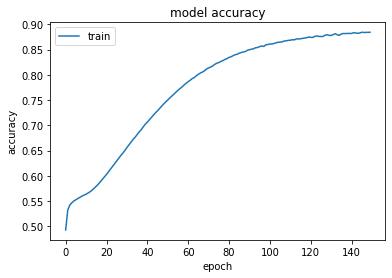

<built-in method keys of dict object at 0x7ff1af5234b0>


In [33]:
# # summarize history for accuracy
plt.plot(history.history['acc'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# # summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

print(history.history.keys)

In [34]:
import numpy as np


from keras.preprocessing.sequence import pad_sequences
print("##########################################")
print("#       start chatting ver. 1.0          #")
print("##########################################")


prepro1 = ""
while prepro1 != 'q':
    prepro1  = input("you : ")
    ## prepro1 = "Hello"

    prepro1 = clean_text(prepro1)
    ## prepro1 = "hello"

    prepro = [prepro1]
    ## prepro1 = ["hello"]

    txt = []
    for x in prepro:
        # x = "hello"
        lst = []
        for y in x.split():
            ## y = "hello"
            try:
                lst.append(vocab[y])
                ## vocab['hello'] = 454
            except:
                lst.append(vocab['<OUT>'])
        txt.append(lst)

    ## txt = [[454]]
    txt = pad_sequences(txt, 13, padding='post')

    ## txt = [[454,0,0,0,.........13]]

    stat = enc_model.predict( txt )

    empty_target_seq = np.zeros( ( 1 , 1) )
     ##   empty_target_seq = [0]


    empty_target_seq[0, 0] = vocab['<SOS>']
    ##    empty_target_seq = [255]

    stop_condition = False
    decoded_translation = ''

    while not stop_condition :

        dec_outputs , h, c= dec_model.predict([ empty_target_seq] + stat )
        decoder_concat_input = dense(dec_outputs)
        ## decoder_concat_input = [0.1, 0.2, .4, .0, ...............]

        sampled_word_index = np.argmax( decoder_concat_input[0, -1, :] )
        ## sampled_word_index = [2]

        sampled_word = inv_vocab[sampled_word_index] + ' '

        ## inv_vocab[2] = 'hi'
        ## sampled_word = 'hi '

        if sampled_word != '<EOS> ':
            decoded_translation += sampled_word  

        if sampled_word == '<EOS> ' or len(decoded_translation.split()) > 13:
            stop_condition = True 

        empty_target_seq = np.zeros( ( 1 , 1 ) )  
        empty_target_seq[ 0 , 0 ] = sampled_word_index
        ## <SOS> - > hi
        ## hi --> <EOS>
        stat = [h, c]  

    print("chatbot : ", decoded_translation )
    print("==============================================")  

##########################################
#       start chatting ver. 1.0          #
##########################################
you : hi


chatbot :  hi 
you : do you work?
chatbot :  i volunteer i read to blind people one day a week 
you : do you like coffee?
chatbot :  <OUT> <OUT> on the load 
you : q
chatbot :  <OUT> 
